In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [4]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [ ]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [5]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

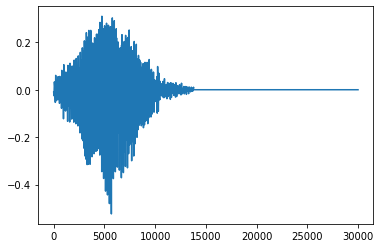

In [ ]:
plt.plot(train[2])

In [ ]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [ ]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [ ]:
print(np.shape(test)[1])

30000


In [7]:
verbose, epochs, batch_size = 1, 10, 32

In [8]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [ ]:
n_timesteps

942

In [ ]:
train.shape[0],train.shape[1]

(942, 30000)

In [9]:
train1=np.reshape(train,(train.shape[0],500,60))
train1.shape

(942, 500, 60)

In [10]:
test1=np.reshape(test,(test.shape[0],500,60))
test1.shape

(558, 500, 60)

In [ ]:
train_labels.shape

(942, 2)

In [ ]:
train.shape[1]

30000

In [11]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(500,60)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=15))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 498, 64)           11584     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 33, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2112)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               211300    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [13]:
from scipy import misc
import sklearn
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

train_x, test_x, train_y, test_y = train_test_split(train1, y_train, random_state = 101, test_size=0.25)

def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=200, BATCH_SIZE=128):
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results




In [14]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
n_folds=4
epochs=200
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/200
5/5 [==============================] - 0s 70ms/step - loss: 2.3557 - accuracy: 0.0893 - val_loss: 2.3251 - val_accuracy: 0.0781
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 2.3235 - accuracy: 0.1384 - val_loss: 2.2943 - val_accuracy: 0.1406
Epoch 3/200
5/5 [==============================] - 0s 16ms/step - loss: 2.3030 - accuracy: 0.1331 - val_loss: 2.2758 - val_accuracy: 0.2031
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 2.2774 - accuracy: 0.1699 - val_loss: 2.2602 - val_accuracy: 0.2656
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 2.2718 - accuracy: 0.1821 - val_loss: 2.2462 - val_accuracy: 0.2344
Epoch 6/200
5/5 [==============================] - 0s 15ms/step - loss: 2.2591 - accuracy: 0.1594 - val_loss: 2.2431 - val_accuracy: 0.2344
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 2.2458 - accuracy: 0.1786 - val_loss: 2.2328 - val_accuracy: 0.2656

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train1, y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 0s 6ms/step - loss: 0.3989 - accuracy: 0.8790
Epoch 2/500
30/30 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8705
Epoch 3/500
30/30 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8673
Epoch 4/500
30/30 [==============================] - 0s 6ms/step - loss: 0.3959 - accuracy: 0.8800
Epoch 5/500
30/30 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8726
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8832
Epoch 7/500
30/30 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8662
Epoch 8/500
30/30 [==============================] - 0s 5ms/step - loss: 0.3975 - accuracy: 0.8875
Epoch 9/500
30/30 [==============================] - 0s 5ms/step - loss: 0.3945 - accuracy: 0.8684
Epoch 10/500
30/30 [==============================] - 0s 5ms/step - loss: 0.3719 - accuracy: 0.8992
Epoch 11/

In [16]:
pred = model.predict(test1)

In [17]:
np.argmax(pred[1])

9

In [20]:
pred.shape

(558, 10)

In [21]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [22]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu11.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
